# Image Loading and Preprocessing using a Numpy Array

This example demonstrates how to create a Tensorflow Datasets using images and labels derived from a Numpy Array

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from datasets import TFImageDataset

%config InlineBackend.figure_format = 'retina'

Let's import the MNIST dataset:

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


Now create a `TFImageDataset` object, specifying the directory where individual images are located. `flow` method with by default ensure that images are present in the specified directory and return an error if otherwise.

In [4]:
dataset = TFImageDataset()
train_ds = dataset.flow(x_train, y_train)
test_ds = dataset.flow(x_test, y_test)

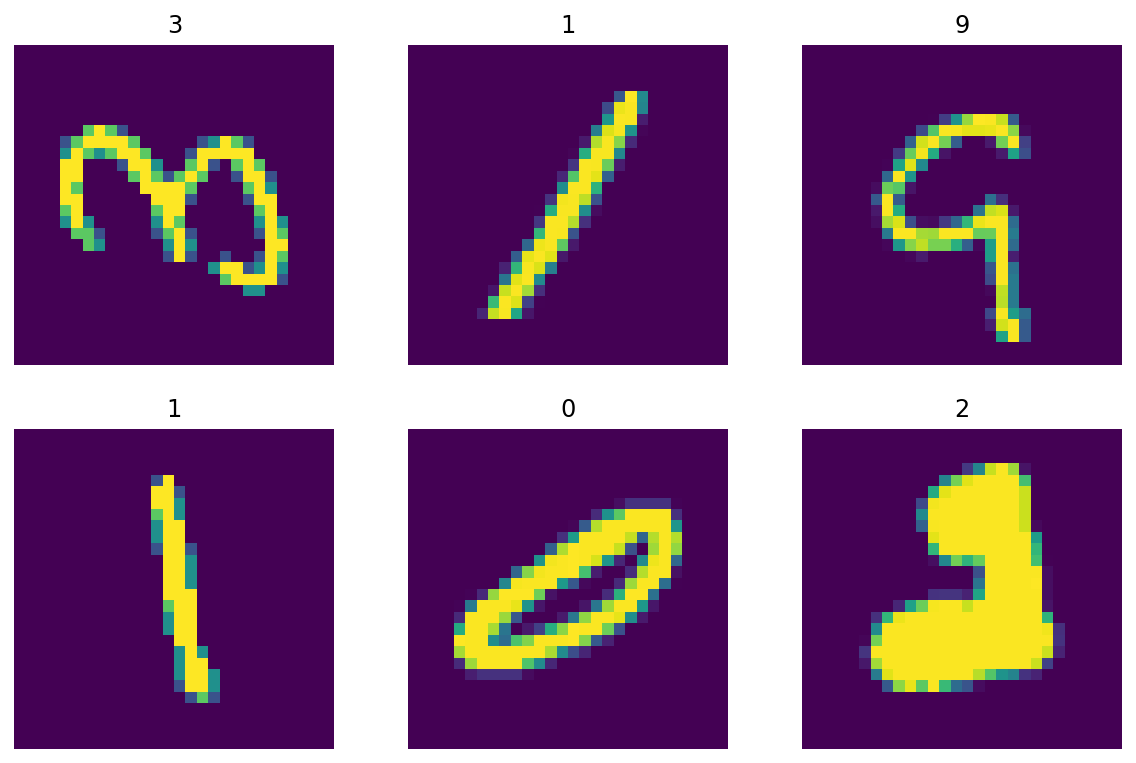

In [18]:
image_batch, label_batch = next(iter(train_ds))
class_names = list(range(10))

plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy())
    label = label_batch[i]
    plt.title(class_names[label])
    plt.axis("off")

## Augmentation Image Dataset Creation

`tensorflow-addons` package versioning is temperamental and is strongly linked to `tensorflow` version itself. This notebook uses `tensorflow` 2.2.0 and therefore requires `tensorlfow-addons` 0.10.0

In [9]:
import tensorflow as tf
import tensorflow_addons as tfa

In [10]:
tfa.__version__

'0.10.0'

Now let's try something more challenging and apply a set of data augmentation steps. Note that 90-degree rotation is applied to images with 50% probability.

**NOTE:** Random choice should be set through the `tf.random.uniform` function

In [23]:
def augment(image):
    image = tf.image.random_brightness(image, max_delta=0.5)
    rotate = tf.random.uniform([]) > 0.5
    if rotate:
        image = tf.image.rot90(image)
    
    return image

In [24]:
train_generator = TFImageDataset(augmentation_function=augment)
test_generator = TFImageDataset()

train_ds = train_generator.flow(x_train, y_train)
test_ds = test_generator.flow(x_test, y_test)

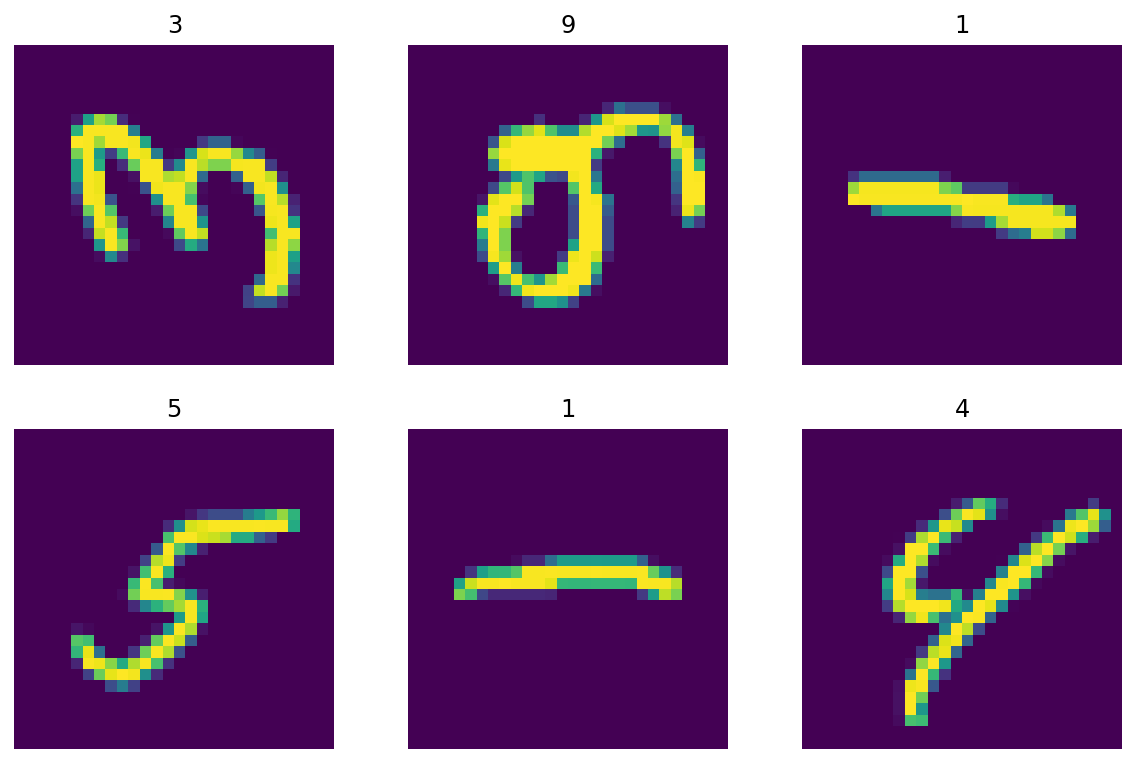

In [25]:
image_batch, label_batch = next(iter(train_ds))
class_names = list(range(10))

plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy())
    label = label_batch[i]
    plt.title(class_names[label])
    plt.axis("off")

## Train a simple model

The `TFImageDataset` can now be used directly with the Tensorflow Model object.

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

In [27]:
model.fit(train_ds,
          epochs=6,
          validation_data=test_ds)

Epoch 1/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5240 - accuracy: 0.8420 - val_loss: 0.2676 - val_accuracy: 0.9248
Epoch 2/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2676 - accuracy: 0.9195 - val_loss: 0.1946 - val_accuracy: 0.9404
Epoch 3/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2088 - accuracy: 0.9361 - val_loss: 0.1742 - val_accuracy: 0.9462
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1794 - accuracy: 0.9464 - val_loss: 0.1512 - val_accuracy: 0.9536
Epoch 5/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1607 - accuracy: 0.9519 - val_loss: 0.1335 - val_accuracy: 0.9593
Epoch 6/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1430 - accuracy: 0.9560 - val_loss: 0.1335 - val_accuracy: 0.9610
